In [1]:
%matplotlib inline

In [2]:
import os 
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
loss_summary = []
pred = []
grad_norm = []

n_classes = 1
batch_size = 50
nm_epochs = 700
train_num_batches_per_epoch = 1000 // 50

In [5]:
x = tf.placeholder(tf.float32, [None,1])
y = tf.placeholder(tf.float32,[None,1])

In [6]:
def sin_function(source):
    target = np.sin(5. * np.pi * source) / (5. * np.pi * source)
    return target

In [7]:
source = np.arange(1e-6, 1, 0.001).reshape(-1, 1)
target = sin_function(source)

In [8]:
source

array([[1.00000e-06],
       [1.00100e-03],
       [2.00100e-03],
       [3.00100e-03],
       [4.00100e-03],
       [5.00100e-03],
       [6.00100e-03],
       [7.00100e-03],
       [8.00100e-03],
       [9.00100e-03],
       [1.00010e-02],
       [1.10010e-02],
       [1.20010e-02],
       [1.30010e-02],
       [1.40010e-02],
       [1.50010e-02],
       [1.60010e-02],
       [1.70010e-02],
       [1.80010e-02],
       [1.90010e-02],
       [2.00010e-02],
       [2.10010e-02],
       [2.20010e-02],
       [2.30010e-02],
       [2.40010e-02],
       [2.50010e-02],
       [2.60010e-02],
       [2.70010e-02],
       [2.80010e-02],
       [2.90010e-02],
       [3.00010e-02],
       [3.10010e-02],
       [3.20010e-02],
       [3.30010e-02],
       [3.40010e-02],
       [3.50010e-02],
       [3.60010e-02],
       [3.70010e-02],
       [3.80010e-02],
       [3.90010e-02],
       [4.00010e-02],
       [4.10010e-02],
       [4.20010e-02],
       [4.30010e-02],
       [4.40010e-02],
       [4.

In [9]:
target

array([[ 1.00000000e+00],
       [ 9.99958795e-01],
       [ 9.99835350e-01],
       [ 9.99629684e-01],
       [ 9.99341827e-01],
       [ 9.98971822e-01],
       [ 9.98519724e-01],
       [ 9.97985598e-01],
       [ 9.97369526e-01],
       [ 9.96671597e-01],
       [ 9.95891915e-01],
       [ 9.95030595e-01],
       [ 9.94087765e-01],
       [ 9.93063565e-01],
       [ 9.91958145e-01],
       [ 9.90771669e-01],
       [ 9.89504313e-01],
       [ 9.88156265e-01],
       [ 9.86727723e-01],
       [ 9.85218898e-01],
       [ 9.83630014e-01],
       [ 9.81961306e-01],
       [ 9.80213020e-01],
       [ 9.78385414e-01],
       [ 9.76478758e-01],
       [ 9.74493334e-01],
       [ 9.72429434e-01],
       [ 9.70287365e-01],
       [ 9.68067440e-01],
       [ 9.65769989e-01],
       [ 9.63395349e-01],
       [ 9.60943871e-01],
       [ 9.58415916e-01],
       [ 9.55811857e-01],
       [ 9.53132077e-01],
       [ 9.50376971e-01],
       [ 9.47546944e-01],
       [ 9.44642414e-01],
       [ 9.4

In [10]:
num_samples = source.shape[0]

In [11]:
num_samples

1000

In [12]:
def neural_network_model(data): #571
    hidden_1_layer = {'weights':tf.Variable(tf.truncated_normal([1, 5], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[5]))}

    hidden_2_layer = {'weights':tf.Variable(tf.truncated_normal([5, 10], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[10]))}

    hidden_3_layer = {'weights':tf.Variable(tf.truncated_normal([10, 10], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[10]))}
    
    hidden_4_layer = {'weights':tf.Variable(tf.truncated_normal([10, 10], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[10]))}
    
    hidden_5_layer = {'weights':tf.Variable(tf.truncated_normal([10, 10], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[10]))}
    
    hidden_6_layer = {'weights':tf.Variable(tf.truncated_normal([10, 10], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[10]))}
    
    hidden_7_layer = {'weights':tf.Variable(tf.truncated_normal([10, 5], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[5]))}

    output_layer = {'weights':tf.Variable(tf.truncated_normal([5, 1], stddev=0.1)),
                    'biases':tf.Variable(tf.constant(0.1, shape=[1])),}


    l1 = tf.add(tf.matmul(data, hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1, hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2, hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)
    
    l4 = tf.add(tf.matmul(l3, hidden_4_layer['weights']), hidden_4_layer['biases'])
    l4 = tf.nn.relu(l4)
    
    l5 = tf.add(tf.matmul(l4, hidden_5_layer['weights']), hidden_5_layer['biases'])
    l5 = tf.nn.relu(l5)
    
    l6 = tf.add(tf.matmul(l5, hidden_6_layer['weights']), hidden_6_layer['biases'])
    l6 = tf.nn.relu(l6)
    
    l7 = tf.add(tf.matmul(l6, hidden_7_layer['weights']), hidden_7_layer['biases'])
    l7 = tf.nn.relu(l7)

    output = tf.matmul(l7, output_layer['weights']) + output_layer['biases']

    return output

In [13]:
def next_batch(source, target, batch_size):

   # Shuffle data
   shuffle_indices = np.random.permutation(np.arange(len(target)))
   source = source[shuffle_indices]
   target = target[shuffle_indices]

   for batch_i in range(0, len(source)//batch_size):
      start_i = batch_i * batch_size
      source_batch = source[start_i:start_i + batch_size]
      target_batch = target[start_i:start_i + batch_size]

      yield np.array(source_batch), np.array(target_batch)

In [14]:
def train_neural_network(x):
    prediction = neural_network_model(x)
    cost = tf.reduce_mean(tf.square(prediction - y))
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
    train_step = optimizer.minimize(cost)
    gradient_step = tf.gradients(cost, tf.trainable_variables())
    gradient_norm = tf.global_norm(gradient_step)

    config=tf.ConfigProto()
    config.gpu_options.allow_growth=True
    sess = tf.Session(config=config)
    sess.run(tf.global_variables_initializer())

    for epoch in range(nm_epochs):
        epoch_loss = 0.0
        epoch_grads = 0.0
        for epoch_x, epoch_y in next_batch(source, target, batch_size):
            _, c, gradients = sess.run([train_step, cost, gradient_norm], feed_dict={x: epoch_x, y: epoch_y})
            epoch_loss += c / train_num_batches_per_epoch
            epoch_grads += gradients / train_num_batches_per_epoch
        loss_summary.append(epoch_loss)
        grad_norm.append(epoch_grads)
        print('Epoch', epoch, 'completed out of',nm_epochs,'loss:',epoch_loss, 'gradient_norm:', epoch_grads)

    pred.extend(sess.run(prediction, feed_dict={x:source}))
    return pred

In [15]:
prediction = train_neural_network(x)

Epoch 0 completed out of 700 loss: 0.08768070433288813 gradient_norm: 0.08272558227181435
Epoch 1 completed out of 700 loss: 0.08758284859359264 gradient_norm: 0.05901959866750985
Epoch 2 completed out of 700 loss: 0.08756082644686104 gradient_norm: 0.06877083184808726
Epoch 3 completed out of 700 loss: 0.08759610243141651 gradient_norm: 0.07765979319810867
Epoch 4 completed out of 700 loss: 0.08758263085037471 gradient_norm: 0.06866556210443378
Epoch 5 completed out of 700 loss: 0.08760919552296402 gradient_norm: 0.05798489097505808
Epoch 6 completed out of 700 loss: 0.087546013481915 gradient_norm: 0.061143279261887076
Epoch 7 completed out of 700 loss: 0.08757912926375865 gradient_norm: 0.09302841098979116
Epoch 8 completed out of 700 loss: 0.08722020313143729 gradient_norm: 0.08439128922764211
Epoch 9 completed out of 700 loss: 0.08464356726035475 gradient_norm: 0.07972248625010252
Epoch 10 completed out of 700 loss: 0.07238895781338216 gradient_norm: 0.13507527988404033
Epoch 11 c

Epoch 92 completed out of 700 loss: 0.002530305908294395 gradient_norm: 0.04953800840303302
Epoch 93 completed out of 700 loss: 0.002503238432109356 gradient_norm: 0.04686492364853621
Epoch 94 completed out of 700 loss: 0.0024294700822792945 gradient_norm: 0.030657351529225704
Epoch 95 completed out of 700 loss: 0.0024712549289688467 gradient_norm: 0.050175690278410914
Epoch 96 completed out of 700 loss: 0.0024322090495843443 gradient_norm: 0.04160894008819014
Epoch 97 completed out of 700 loss: 0.002393803268205375 gradient_norm: 0.03557606968097388
Epoch 98 completed out of 700 loss: 0.0023463299614377322 gradient_norm: 0.030202437099069362
Epoch 99 completed out of 700 loss: 0.0024130578385666013 gradient_norm: 0.046077062562108036
Epoch 100 completed out of 700 loss: 0.002343936084071174 gradient_norm: 0.04041553817223757
Epoch 101 completed out of 700 loss: 0.002318885497516021 gradient_norm: 0.03727461285889149
Epoch 102 completed out of 700 loss: 0.0023944024636875843 gradient_n

Epoch 180 completed out of 700 loss: 0.000289825374056818 gradient_norm: 0.060911280987784255
Epoch 181 completed out of 700 loss: 0.0002570004977314966 gradient_norm: 0.030896307807415726
Epoch 182 completed out of 700 loss: 0.0002708131742110708 gradient_norm: 0.043365526292473075
Epoch 183 completed out of 700 loss: 0.00028982139483559884 gradient_norm: 0.05968156531453133
Epoch 184 completed out of 700 loss: 0.00028410807499312796 gradient_norm: 0.05851030787453056
Epoch 185 completed out of 700 loss: 0.0002965443483844865 gradient_norm: 0.0629093556664884
Epoch 186 completed out of 700 loss: 0.00027942104134126566 gradient_norm: 0.05265429392457009
Epoch 187 completed out of 700 loss: 0.00027783288605860436 gradient_norm: 0.05048184534534812
Epoch 188 completed out of 700 loss: 0.000278067422186723 gradient_norm: 0.053605672926642
Epoch 189 completed out of 700 loss: 0.00027471021894598374 gradient_norm: 0.05230086864903569
Epoch 190 completed out of 700 loss: 0.000292299960710806

Epoch 267 completed out of 700 loss: 0.00023856981897552032 gradient_norm: 0.04824055409990251
Epoch 268 completed out of 700 loss: 0.00022570314613403752 gradient_norm: 0.03835049215704203
Epoch 269 completed out of 700 loss: 0.00024026589817367492 gradient_norm: 0.044977913983166216
Epoch 270 completed out of 700 loss: 0.00024354976449103558 gradient_norm: 0.04341781856492161
Epoch 271 completed out of 700 loss: 0.00023047133581712844 gradient_norm: 0.03677301947027444
Epoch 272 completed out of 700 loss: 0.00023739513271721078 gradient_norm: 0.045632997527718544
Epoch 273 completed out of 700 loss: 0.00022743141526007096 gradient_norm: 0.033722643321380016
Epoch 274 completed out of 700 loss: 0.00023051480675349015 gradient_norm: 0.04231813782826067
Epoch 275 completed out of 700 loss: 0.00035489887268340685 gradient_norm: 0.08873984087258578
Epoch 276 completed out of 700 loss: 0.00030996812711237 gradient_norm: 0.08046668041497469
Epoch 277 completed out of 700 loss: 0.00027368808

Epoch 355 completed out of 700 loss: 0.00020408419295563361 gradient_norm: 0.06325908144935964
Epoch 356 completed out of 700 loss: 0.00024529851216357205 gradient_norm: 0.08269136790186166
Epoch 357 completed out of 700 loss: 0.00018242680271214338 gradient_norm: 0.052653609495609995
Epoch 358 completed out of 700 loss: 0.00017193432686326554 gradient_norm: 0.04708382836543023
Epoch 359 completed out of 700 loss: 0.00016895207882043904 gradient_norm: 0.051856009522452944
Epoch 360 completed out of 700 loss: 0.00017074276929633924 gradient_norm: 0.05447138310410082
Epoch 361 completed out of 700 loss: 0.00016179471531359014 gradient_norm: 0.04873257223516702
Epoch 362 completed out of 700 loss: 0.00014901911163178738 gradient_norm: 0.036979956459254025
Epoch 363 completed out of 700 loss: 0.00013938511219748764 gradient_norm: 0.025122606661170718
Epoch 364 completed out of 700 loss: 0.000140181526694505 gradient_norm: 0.02797029931098223
Epoch 365 completed out of 700 loss: 0.000144306

Epoch 443 completed out of 700 loss: 6.060665064069327e-05 gradient_norm: 0.02744903448037803
Epoch 444 completed out of 700 loss: 6.527374716824852e-05 gradient_norm: 0.03337887059897184
Epoch 445 completed out of 700 loss: 5.805144310215837e-05 gradient_norm: 0.02150913286022842
Epoch 446 completed out of 700 loss: 5.5322359366982695e-05 gradient_norm: 0.02412788278888911
Epoch 447 completed out of 700 loss: 5.814076457681949e-05 gradient_norm: 0.03246212457306683
Epoch 448 completed out of 700 loss: 6.176975020935061e-05 gradient_norm: 0.032298524584621194
Epoch 449 completed out of 700 loss: 5.863144024260691e-05 gradient_norm: 0.03105704672634602
Epoch 450 completed out of 700 loss: 6.151522857180681e-05 gradient_norm: 0.03969623222947121
Epoch 451 completed out of 700 loss: 7.843461071388447e-05 gradient_norm: 0.054320454411208634
Epoch 452 completed out of 700 loss: 0.00014157542882458073 gradient_norm: 0.08925568386912344
Epoch 453 completed out of 700 loss: 0.00028650624408328

Epoch 531 completed out of 700 loss: 2.975916945615609e-05 gradient_norm: 0.029887108970433472
Epoch 532 completed out of 700 loss: 2.3258702231032658e-05 gradient_norm: 0.023829220142215495
Epoch 533 completed out of 700 loss: 2.185136791013065e-05 gradient_norm: 0.0210729846265167
Epoch 534 completed out of 700 loss: 2.1400939363047656e-05 gradient_norm: 0.02369678802788257
Epoch 535 completed out of 700 loss: 2.327954075553862e-05 gradient_norm: 0.02152452180162072
Epoch 536 completed out of 700 loss: 3.0907524433132494e-05 gradient_norm: 0.03876340445131063
Epoch 537 completed out of 700 loss: 2.590550766399247e-05 gradient_norm: 0.02705278638750315
Epoch 538 completed out of 700 loss: 2.0162969849479854e-05 gradient_norm: 0.02008245484903455
Epoch 539 completed out of 700 loss: 2.9103348742864904e-05 gradient_norm: 0.029025123873725536
Epoch 540 completed out of 700 loss: 5.409062423495925e-05 gradient_norm: 0.047898933105170724
Epoch 541 completed out of 700 loss: 2.1999725322530

Epoch 619 completed out of 700 loss: 2.2288019863481168e-05 gradient_norm: 0.030398495425470174
Epoch 620 completed out of 700 loss: 2.003961417358369e-05 gradient_norm: 0.029590672627091412
Epoch 621 completed out of 700 loss: 1.5971684570104115e-05 gradient_norm: 0.020151506178081036
Epoch 622 completed out of 700 loss: 2.3845619398343843e-05 gradient_norm: 0.031201268592849375
Epoch 623 completed out of 700 loss: 1.930505513882963e-05 gradient_norm: 0.028654474066570408
Epoch 624 completed out of 700 loss: 1.1774399808928136e-05 gradient_norm: 0.01721689477562904
Epoch 625 completed out of 700 loss: 1.2716832225123655e-05 gradient_norm: 0.021275446354411538
Epoch 626 completed out of 700 loss: 1.172796833088796e-05 gradient_norm: 0.02018235099967569
Epoch 627 completed out of 700 loss: 1.7475056915827734e-05 gradient_norm: 0.03312527560628951
Epoch 628 completed out of 700 loss: 1.054487829605932e-05 gradient_norm: 0.01726659634150565
Epoch 629 completed out of 700 loss: 1.097435942

In [16]:
prediction

[array([1.0025947], dtype=float32),
 array([1.0022988], dtype=float32),
 array([1.0020024], dtype=float32),
 array([1.0017062], dtype=float32),
 array([1.0014098], dtype=float32),
 array([1.0011132], dtype=float32),
 array([1.0004236], dtype=float32),
 array([0.99932545], dtype=float32),
 array([0.998227], dtype=float32),
 array([0.9971288], dtype=float32),
 array([0.99603057], dtype=float32),
 array([0.9949323], dtype=float32),
 array([0.9938339], dtype=float32),
 array([0.9927356], dtype=float32),
 array([0.9916371], dtype=float32),
 array([0.9905391], dtype=float32),
 array([0.9894409], dtype=float32),
 array([0.98834217], dtype=float32),
 array([0.98698294], dtype=float32),
 array([0.98521125], dtype=float32),
 array([0.98343974], dtype=float32),
 array([0.9816682], dtype=float32),
 array([0.9798962], dtype=float32),
 array([0.97812486], dtype=float32),
 array([0.9763533], dtype=float32),
 array([0.9745815], dtype=float32),
 array([0.97281027], dtype=float32),
 array([0.9704273], d

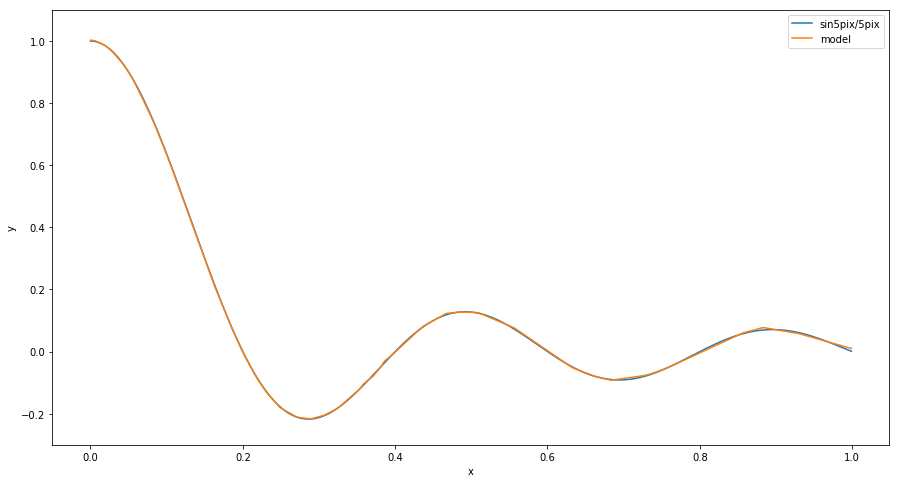

In [17]:
plt.figure(figsize=(15, 8))
plt.plot(source, target, label="sin5pix/5pix")
plt.plot(source, prediction, label="model")
plt.xlabel('x')
plt.ylabel('y')
plt.ylim((-0.3, 1.1))
plt.legend(loc='best')
plt.show()

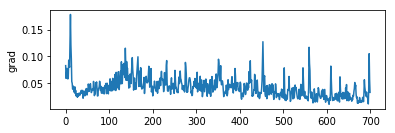

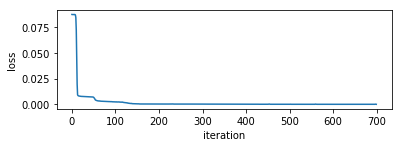

In [18]:
plt.figure(1)
plt.subplot(211)
plt.plot(np.arange(0, nm_epochs), grad_norm)
plt.ylabel('grad')

plt.figure(2)
plt.subplot(211)
plt.plot(np.arange(0, nm_epochs), loss_summary)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

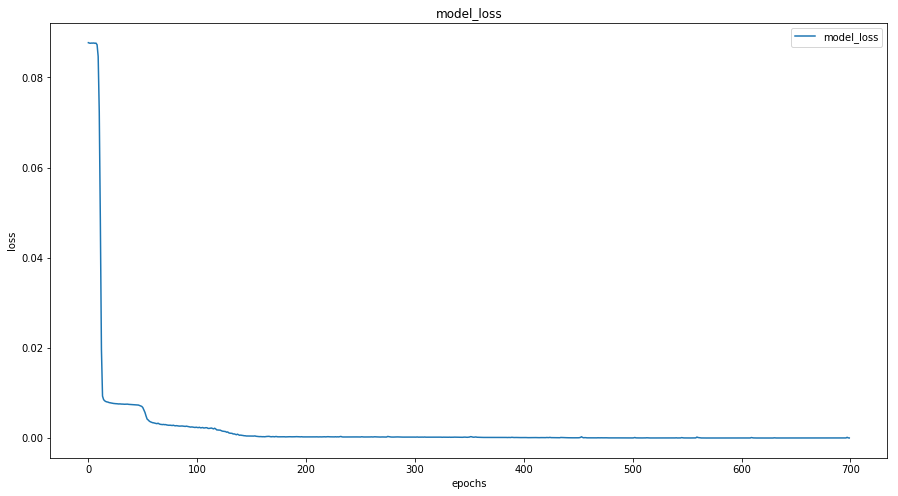

In [19]:
plt.figure(figsize=(15, 8))
plt.plot(np.arange(0, nm_epochs), loss_summary, label="model_loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('model_loss')
plt.legend(loc='best')
plt.show()

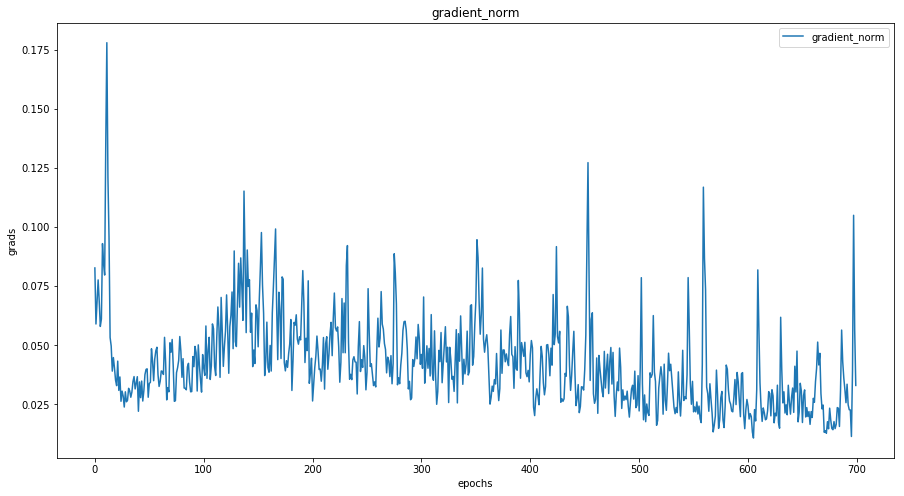

In [20]:
plt.figure(figsize=(15, 8))
plt.plot(np.arange(0, nm_epochs), grad_norm, label="gradient_norm")
plt.xlabel('epochs')
plt.ylabel('grads')
plt.title('gradient_norm')
plt.legend(loc='best')
plt.show()